# Create choropleth using Toronto JSON file

In [1]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point

# Load the JSON data as a GeoDataFrame
neighbourhoods_gdf = gpd.read_file(r"C:\Users\agwsi\CF\6. Advanced Analytics and Dashboard design\Project folder\2. Orginal Data\toronto_topo.json")

#### Import Fire Incidents data and covert latitude and longitude to a geo dataframe

In [2]:
incidents_df = pd.read_csv(r"C:\Users\agwsi\CF\6. Advanced Analytics and Dashboard design\Project folder\3. Prepared Data\alarm_failure_column.csv")

# Convert the latitude and longitude columns to a GeoDataFrame
geometry = [Point(xy) for xy in zip(incidents_df['longitude'], incidents_df['latitude'])]
incidents_gdf = gpd.GeoDataFrame(incidents_df, geometry=geometry)

In [3]:
# Ensure both geo dataframes use the same coordinate reference system (CRS)
incidents_gdf.crs = neighbourhoods_gdf.crs

# Perform join
joined_gdf = gpd.sjoin(incidents_gdf, neighbourhoods_gdf, how="left", predicate="within")

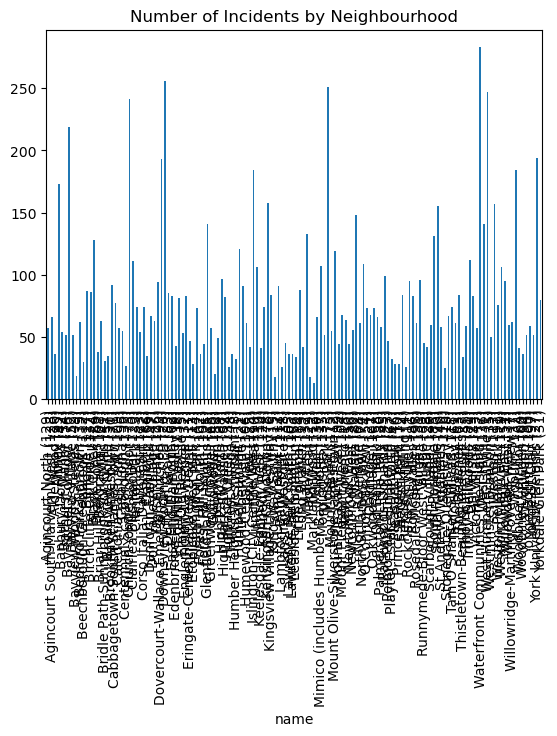

In [4]:
import matplotlib.pyplot as plt

# Plotting the count of incidents by neighbourhood
joined_gdf.groupby('name').size().plot(kind='bar')
plt.title('Number of Incidents by Neighbourhood')
plt.show()

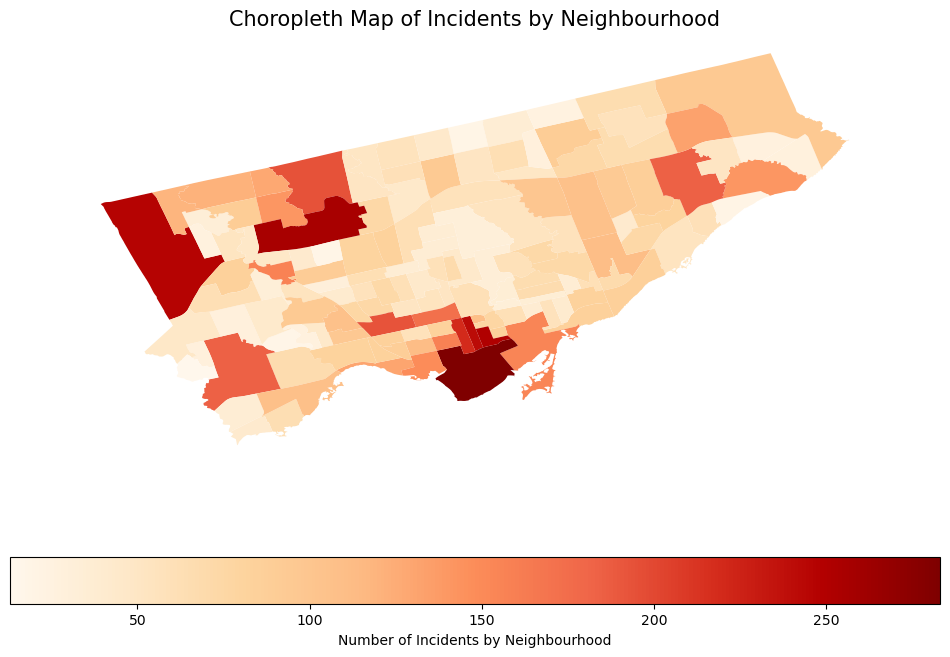

In [5]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt



# Aggregate data by neighbourhood and incident count
neighbourhood_incident_counts = joined_gdf.groupby('name').size().reset_index(name='incident_count')

# Merge the counts back to the neighbourhoods geo data frame
neighbourhoods_gdf = neighbourhoods_gdf.merge(neighbourhood_incident_counts, on='name', how='left')

# Plot choropleth map
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
neighbourhoods_gdf.plot(column='incident_count', ax=ax, legend=True, 
                       legend_kwds={'label': "Number of Incidents by Neighbourhood",
                                    'orientation': "horizontal"},
                       cmap='OrRd',  
                       missing_kwds={"color": "lightgrey"})  

# Customize plot
ax.set_title("Choropleth Map of Incidents by Neighbourhood", fontsize=15)
ax.set_axis_off()  # Hide axis
plt.show()


### There are a few areas which appear to have more incidents than others. However, these areas tend to correspond with the areas of Toronto with higher population densities (analysis for this is on a seperate script). For this reason it´s safe to say there isn´t an area of particular concern and simply put the higher the population density the more probability there is for a fire incident.